In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [14]:
def initiate_position(N, M):
    # Initialize 1-d array where cars are in position 0 - M-1
    N_circle = np.zeros(N)
    for i in range(M):
        N_circle[i] = 1
    return N_circle

In [15]:
# Returns indices of cars that are able to move forward
def find_movable_cars(N_circle, N):
    movable_car_index = []
    for i in range(N): #i is the location of the cars
        #cannot be last i
        if i != N-1:
            if N_circle[i] == 1 and N_circle[i+1] == 0:
                #movable
                movable_car_index.append((i, i+1))
        else: #when i is the last loc
            if N_circle[i] == 1 and N_circle[0] == 0:
                movable_car_index.append((i, 0))
    return movable_car_index

In [61]:
def move_cars(N_circle, movable_cars):
    # Pick a random car out of the list of movable cars
    move_car = movable_cars[np.random.choice(range(len(movable_cars)))]
    
    # Move the car forward one position
    N_circle[move_car[0]] = 0
    N_circle[move_car[1]] = 1
    
    # Return the updated car_circle
    return N_circle

#N_circle = initiate_position(25, 10)
moveable_cars = find_movable_cars(N_circle, 25)

N_circle = move_cars(N_circle, moveable_cars)
N_circle

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

# Run

In [17]:
# define 
N = 25
M = 10
T = 50

In [35]:
repeat = 999 # num trials
As = [] # list of Averages per trial
Ss = [] # list of s.d's per trial

for _ in range(repeat):
    # Initialize our car circle
    car_circle = initiate_position(N, M)
    t = T
    
    # Move cars for T rounds
    while t:
        movable_cars = find_movable_cars(car_circle, N)
        car_circle = move_cars(car_circle, movable_cars)
        t -= 1
    
    # Average of our current trial
    A = np.dot(np.array(range(N)), car_circle) / M
    
    # Standard Deviation of our current trial
    S = np.sqrt(np.dot(np.square(np.array(range(N))), car_circle)/M - np.square(A))
    
    # Add to our list of average and s.d's
    As.append(A)
    Ss.append(S)
    
movable_cars

[(6, 7), (8, 9), (11, 12), (16, 17), (20, 21)]

In [33]:
df = pd.DataFrame(index=range(len(As)), columns=['A','S'], data={'A':As,'S':Ss})

9.27977977977978
6.139871060596699


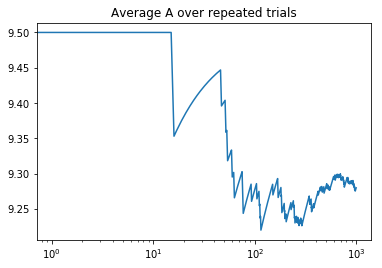

In [62]:
plt.plot(df.expanding().mean()['A'])
plt.title("Average A over repeated trials")
plt.xscale('log')
print(df.A.mean())
print(df.S.mean())

In [63]:
print(df.A.std())
print(df.S.std())

0.7089123111367904
0.8020710765958723


In [28]:
%%timeit
df.A.std()

63.9 µs ± 3.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit
np.std(As)

662 µs ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
